In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    path = "imdb.npz",
    num_words = None,
    skip_top = 0,
    maxlen = None,
    seed = 113,
    start_char = 1,
    oov_char = 2,
    index_from = 3)

In [3]:
word_index = imdb.get_word_index(path = 'imdb_word_index.json')

In [4]:
# examine the data structure.

x_train.shape
y_train.shape

x_test.shape
y_test.shape

x_train[0]
y_train[0]

1

In [5]:
# 4. Identify positive reviews in the dataset

import numpy as np

train_pos = x_train[y_train == 1]
test_pos = x_test[y_test == 1]
all_pos = np.concatenate((train_pos, test_pos))

all_lengths = []

for i in range(len(all_pos)):
    all_lengths = all_lengths + [len(all_pos[i])]

cnt = Counter()

for l in all_lengths:
    cnt[l] += 1

positive_review_length = cnt.copy()

max_val = max(positive_review_length.values())

freq_len = list(positive_review_length.keys())[list(positive_review_length.values()).index(max_val)]

print("The most frequent length for positive reviews is", freq_len,
      "and it occurs", max_val, "times.")

The most frequent length for positive reviews is 125 and it occurs 183 times.


In [6]:
# negative reviews

train_neg = x_train[y_train == 0]
test_neg = x_test[y_test == 0]
all_neg = np.concatenate((train_neg, test_neg))

all_lengths_n = []

for i in range(len(all_neg)):
    all_lengths_n = all_lengths_n + [len(all_neg[i])]

cnt = Counter()

for l in all_lengths_n:
    cnt[l] += 1

negative_review_length = cnt.copy()

max_val = max(negative_review_length.values())

freq_len = list(negative_review_length.keys())[list(negative_review_length.values()).index(max_val)]

print("The most frequent length for positive reviews is", freq_len,
      "and it occurs", max_val, "times.")

The most frequent length for positive reviews is 128 and it occurs 201 times.


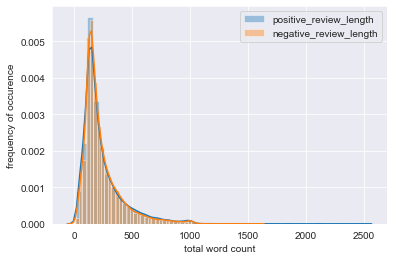

In [7]:
# 5. Find the distribution of word count in positive and negative reviews.
sns.set_style("darkgrid")

fig,ax = plt.subplots()
sns.distplot(all_lengths, label = "positive_review_length")
sns.distplot(all_lengths_n, label = "negative_review_length")
ax.legend()
ax.set(xlabel='total word count', ylabel = 'frequency of occurence')
plt.show()